Clustering using Hierarchical Clustering and AffinityPropagation
(NOTE  : Go through the K-Means Clustering before going through this example)

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
import pandas as pd
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = pd.DataFrame(data.target,columns=['Target'])

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
model = AgglomerativeClustering(3)

In [9]:
model.fit(df[['petal length (cm)','petal width (cm)']])

AgglomerativeClustering(n_clusters=3)

In [10]:
model.n_leaves_

150

In [11]:
df.shape

(150, 4)

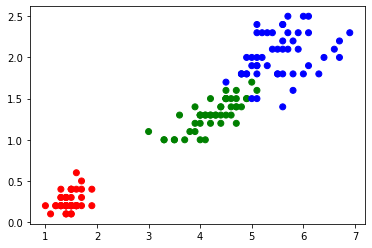

In [13]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['r','g','b'])
# y_hat2 = model.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=colors[y['Target']])

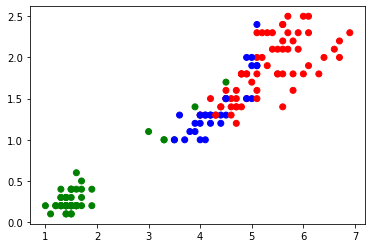

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
colors = np.array(['r','g','b'])
y_hat2 = model.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=colors[y_hat2])

Plotting the dendogram of the model


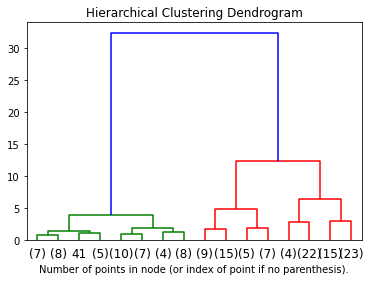

In [30]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Using the one of the non deterministic clustering where the no of clusters is formed by the model itself based onthe reliability and availability which is more powerful.

In [24]:
from sklearn.cluster import AffinityPropagation
model2 = AffinityPropagation()

In [27]:
y_hat2 = model2.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [28]:
y_hat2

array([ 0,  1,  1,  1,  0,  2,  1,  0,  1,  1,  0,  1,  1,  1,  2,  2,  2,
        0,  2,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  2,  2,
        1,  1,  0,  0,  1,  0,  0,  4,  1,  0,  0,  1,  0,  1,  0,  0,  3,
        8,  3,  6,  7,  6,  8,  4,  3,  6,  4,  7,  5,  7,  6,  3,  6,  6,
        5,  6,  7,  7,  5,  7,  7,  8,  3,  3,  7,  6,  6,  6,  6,  7,  6,
        8,  3,  5,  6,  6,  6,  7,  6,  4,  6,  6,  6,  7,  4,  6,  8,  6,
        3,  7,  8, 10,  4, 10,  5,  9,  8,  7,  3,  6,  6,  8,  8,  9, 10,
        5,  3,  6, 10,  7,  3,  3,  7,  7,  7, 10, 10,  9,  7,  7,  7, 10,
        8,  8,  7,  3,  3,  3,  6,  3,  3,  3,  5,  8,  8,  7])

Here, we can see that the model2 has made 10 different clusters.